# Preliminary plotting stuff to get things going

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import rcParams

In [3]:
rcParams['figure.figsize'] = (10, 6)
rcParams['figure.dpi'] = 150
# rcParams['axes.color_cycle'] = Dark2_7
rcParams['lines.linewidth'] = 2
rcParams['axes.facecolor'] = 'white'
rcParams['font.size'] = 14
rcParams['patch.edgecolor'] = 'white'
# rcParams['patch.facecolor'] = Dark2_7[0]
rcParams['font.family'] = 'StixGeneral'


def remove_border(axes=None, top=False, right=False, left=True, bottom=True):
    """
    Minimize chartjunk by stripping out unnecesasry plot borders and axis ticks
    
    The top/right/left/bottom keywords toggle whether the corresponding plot border is drawn
    """
    ax = axes or plt.gca()
    ax.spines['top'].set_visible(top)
    ax.spines['right'].set_visible(right)
    ax.spines['left'].set_visible(left)
    ax.spines['bottom'].set_visible(bottom)
    
    #turn off all ticks
    ax.yaxis.set_ticks_position('none')
    ax.xaxis.set_ticks_position('none')
    
    #now re-enable visibles
    if top:
        ax.xaxis.tick_top()
    if bottom:
        ax.xaxis.tick_bottom()
    if left:
        ax.yaxis.tick_left()
    if right:
        ax.yaxis.tick_right()

In [4]:
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)

# Loading and Cleaning

In [5]:
df=pd.read_csv("../data/games_mongodump.csv")
df.head(5)

,date_time,home_team,away_team,odd_home,odd_away,score_home,score_away,overtime
0,2015-03-13T01:00:00.000Z,Washington Wizards,Memphis Grizzlies,1.259740,4.030000,107,87,False
1,2015-03-12T04:30:00.000Z,Golden State Warriors,Detroit Pistons,1.050000,11.520000,105,98,False
2,2015-03-12T04:30:00.000Z,Portland Trail Blazers,Houston Rockets,1.729927,2.160000,105,100,False
3,2015-03-12T04:00:00.000Z,Phoenix Suns,Minnesota Timberwolves,1.490196,2.720000,106,97,False
4,2015-03-12T03:00:00.000Z,Denver Nuggets,Atlanta Hawks,3.450000,1.330033,115,102,False


In [6]:
df.describe()

,odd_home,odd_away,score_home,score_away,overtime
count,8304.000000,8304.000000,8304.000000,8304.000000,8304
mean,1.868061,3.349489,100.658839,97.692076,0.0611753
std,1.048794,2.545006,12.029303,11.984653,0.239666
min,1.010000,1.020000,59.000000,56.000000,False
25%,1.270000,1.770000,93.000000,90.000000,0
50%,1.540000,2.520000,100.000000,98.000000,0
75%,2.090000,3.870000,108.000000,105.000000,0
max,17.240000,23.430000,163.000000,163.000000,True


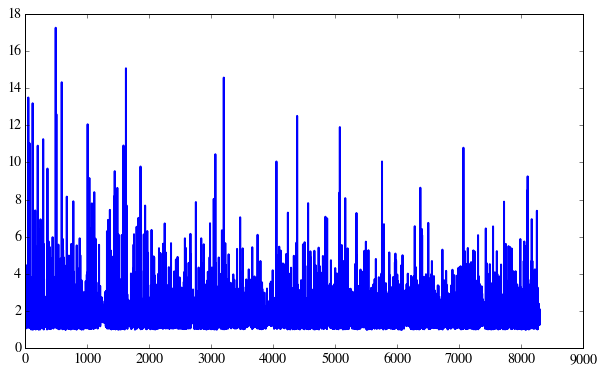

In [7]:
line = plt.figure()
plt.plot(df["odd_home"]);

## Preliminary Analysis and plotting

In [8]:
winner_group = df.groupby('home_team')
winner_group.size()

home_team
Atlanta Hawks             292
Boston Celtics            296
Brooklyn Nets             269
Charlotte Hornets         258
Chicago Bulls             292
Cleveland Cavaliers       280
Dallas Mavericks          287
Denver Nuggets            274
Detroit Pistons           252
East                        2
Golden State Warriors     272
Houston Rockets           284
Indiana Pacers            278
Los Angeles Clippers      284
Los Angeles Lakers        307
Memphis Grizzlies         282
Miami Heat                316
Milwaukee Bucks           265
Minnesota Timberwolves    254
New Orleans Pelicans      257
New York Knicks           258
Oklahoma City Thunder     296
Orlando Magic             285
Philadelphia 76ers        266
Phoenix Suns              268
Portland Trail Blazers    270
Sacramento Kings          256
San Antonio Spurs         305
Sophomores                  3
Team Chuck                  1
Toronto Raptors           265
Utah Jazz                 263
Washington Wizards        263


In [9]:
def nb_of_games(team):
    return len(df.loc[df["home_team"] == team])+len(df.loc[df["away_team"] == team])

In [10]:
teams = set(df["home_team"]).union(set(df["away_team"]))
teams

{'Atlanta Hawks',
 'Boston Celtics',
 'Brooklyn Nets',
 'Charlotte Hornets',
 'Chicago Bulls',
 'Cleveland Cavaliers',
 'Dallas Mavericks',
 'Denver Nuggets',
 'Detroit Pistons',
 'East',
 'Golden State Warriors',
 'Houston Rockets',
 'Indiana Pacers',
 'Los Angeles Clippers',
 'Los Angeles Lakers',
 'Memphis Grizzlies',
 'Miami Heat',
 'Milwaukee Bucks',
 'Minnesota Timberwolves',
 'New Orleans Pelicans',
 'New York Knicks',
 'Oklahoma City Thunder',
 'Orlando Magic',
 'Philadelphia 76ers',
 'Phoenix Suns',
 'Portland Trail Blazers',
 'Rookies',
 'Sacramento Kings',
 'San Antonio Spurs',
 'Sophomores',
 'Team Chuck',
 'Team Shaq',
 'Toronto Raptors',
 'Utah Jazz',
 'Washington Wizards',
 'West'}

In [13]:
df.loc[df["home_team"] == "West"] #in df there is the allstar game, not in games_cleaned

,date_time,home_team,away_team,odd_home,odd_away,score_home,score_away,overtime
3130,2013-02-18T03:00:00.000Z,West,East,1.72,2.17,143,138,False
5332,2011-02-21T03:00:00.000Z,West,East,2.28,1.66,148,143,False
6828,2010-02-15T03:00:00.000Z,West,East,2.16,1.72,139,141,False
7913,2009-02-16T03:00:00.000Z,West,East,1.69,2.18,146,119,False


In [14]:
x = list(teams)
y = [nb_of_games(t) for t in x]
# red_dot = plt.plot(y,"ro")
# plt.legend(red_dot,x)

In [15]:
total_games = pd.DataFrame([x,y])
total_games

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35
0,Los Angeles Lakers,Chicago Bulls,West,San Antonio Spurs,New Orleans Pelicans,Rookies,Philadelphia 76ers,Sophomores,Detroit Pistons,Boston Celtics,Miami Heat,Orlando Magic,Portland Trail Blazers,East,Golden State Warriors,New York Knicks,Washington Wizards,Dallas Mavericks,Minnesota Timberwolves,Los Angeles Clippers,Oklahoma City Thunder,Charlotte Hornets,Milwaukee Bucks,Team Chuck,Memphis Grizzlies,Toronto Raptors,Utah Jazz,Phoenix Suns,Sacramento Kings,Houston Rockets,Cleveland Cavaliers,Atlanta Hawks,Brooklyn Nets,Team Shaq,Indiana Pacers,Denver Nuggets
1,586,569,6,597,520,3,533,3,515,590,619,566,552,6,555,533,539,567,511,561,587,521,528,1,573,525,539,529,515,552,561,591,531,1,574,549


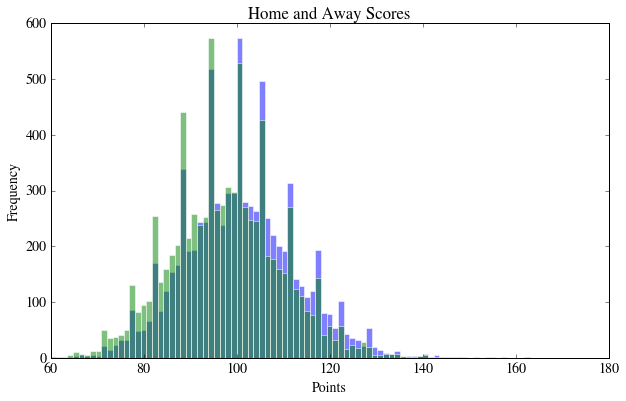

In [16]:
plt.figure()
bins = np.linspace(60, 180, 100)
plt.title("Home and Away Scores")
plt.xlabel("Points")
plt.ylabel("Frequency")
plt.hist(df["score_home"],bins, alpha=0.5)
plt.hist(df["score_away"],bins, alpha=0.5)
plt.show()

In [22]:
scores = pd.DataFrame([df["score_home"],df["score_away"]])
winner_scores = scores.max(0)
looser_scores = scores.min(0)

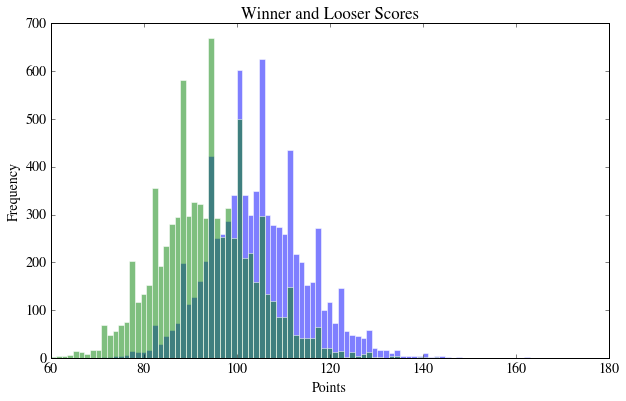

In [23]:
plt.figure()
bins = np.linspace(60, 180, 100)
plt.title("Winner and Looser Scores")
plt.xlabel("Points")
plt.ylabel("Frequency")
plt.hist(winner_scores,bins, alpha=0.5)
plt.hist(looser_scores,bins, alpha=0.5)
plt.show()

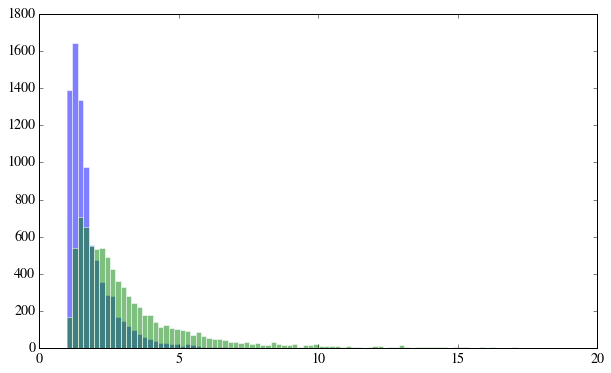

In [24]:
plt.figure()
bins = np.linspace(1, 20, 100)
plt.hist(df["odd_home"],bins, alpha=0.5);
plt.hist(df["odd_away"],bins, alpha=0.5);

(array([ 986.,  757.,  569.,  470.,  306.,  209.,  163.,  104.,   94.,
          44.,    6.,    1.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.]),
 array([  1.        ,   1.19191919,   1.38383838,   1.57575758,
          1.76767677,   1.95959596,   2.15151515,   2.34343434,
          2.53535354,   2.72727273,   2.91919192,   3.11111111,
          3.3030303 ,   3

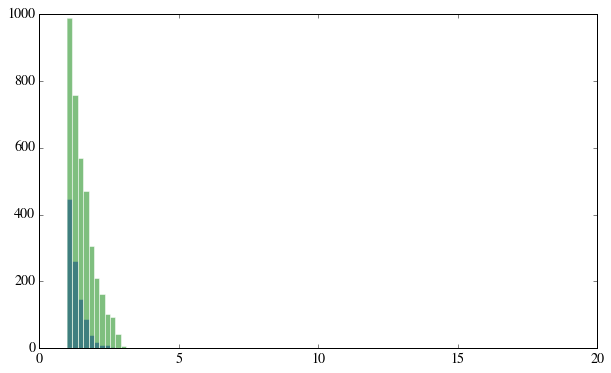

In [33]:
plt.figure()
bins = np.linspace(1, 20, 100)
plt.hist(np.log(df["odd_home"]),bins, alpha=0.5);
plt.hist(np.log(df["odd_away"]),bins, alpha=0.5);
# we wanted to check if the odd_home column was following a log-normal law

## Feature Engineering

In [34]:
g = df
g.head()

,date_time,home_team,away_team,odd_home,odd_away,score_home,score_away,overtime
0,2015-03-13T01:00:00.000Z,Washington Wizards,Memphis Grizzlies,1.259740,4.030000,107,87,False
1,2015-03-12T04:30:00.000Z,Golden State Warriors,Detroit Pistons,1.050000,11.520000,105,98,False
2,2015-03-12T04:30:00.000Z,Portland Trail Blazers,Houston Rockets,1.729927,2.160000,105,100,False
3,2015-03-12T04:00:00.000Z,Phoenix Suns,Minnesota Timberwolves,1.490196,2.720000,106,97,False
4,2015-03-12T03:00:00.000Z,Denver Nuggets,Atlanta Hawks,3.450000,1.330033,115,102,False


In [35]:
# Create a feature that says "home team wins"
y = g["score_home"]>g["score_away"]
y.head()

0    True
1    True
2    True
3    True
4    True
dtype: bool

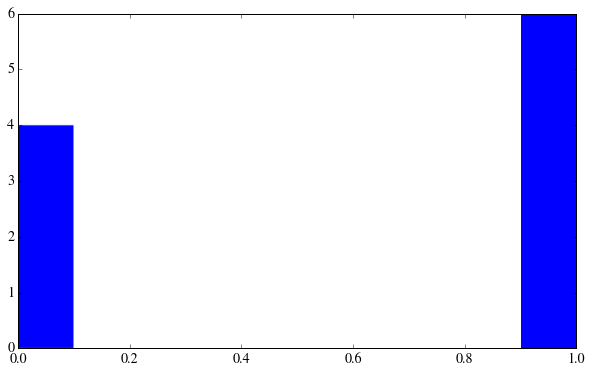

In [58]:
# Accuracy of classifier
plt.hist(y, normed=True);

The accuracy of the classifier "the home team wins" is already 60%.

In [50]:
# Create a feature that says "the lowest odd wins"
n=len(g["odd_home"])
y = g["score_home"]>g["score_away"]
y2=np.zeros(n)
odd_winner=np.zeros(n)
odd_looser=np.zeros(n)
for id in range(n):
    if y[id]:
        odd_winner[id]=g["odd_home"][id]
        odd_looser[id]=g["odd_away"][id]
    else:
        odd_winner[id]=g["odd_away"][id]
        odd_looser[id]=g["odd_home"][id]

y2 = odd_winner <= odd_looser
y2

array([ True,  True,  True, ...,  True, False,  True], dtype=bool)

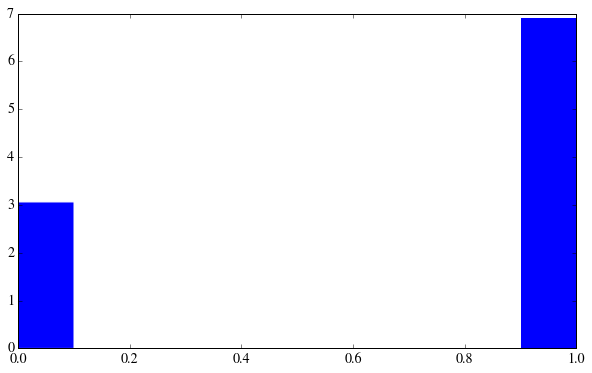

In [56]:
# Accuracy of classifier
plt.hist(y2, normed=True);

The accuracy of the classifier "the lowest odd wins" is already 70%.

In [53]:
surprise = g.loc[y2==False]

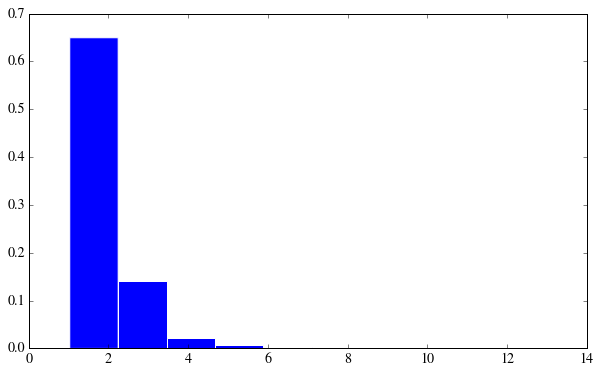

In [55]:
plt.hist(surprise["odd_home"], normed=True);

In [59]:
# Carry on error analysis on the surprise subset